# Import libraries

Full Video:  https://youtu.be/V51VkGNG_DE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Dense
import cv2
import os 
import glob

# Loading Images Data (Storing as X)


In [2]:
# Load Dataset
img_dir = "data/raw/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes


# storing in X
IMAGE_SIZE = 224
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [3]:
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

# Annotation Labels

We create the variable y containing all the bounding boxe annotations (label). 
Before that, we will have to resize the annotations so that it fits the new size of the images (200*200). We create a function resizeannotation for that. 

In [4]:
from lxml import etree

def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmin), int(ymin), int(xmax), int(ymax)]


path = 'data/raw/annotations'
text_files = ['data/raw/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [5]:
len(y)

433

# Data Visualization

And we display the first eighteen image of the dataset : 

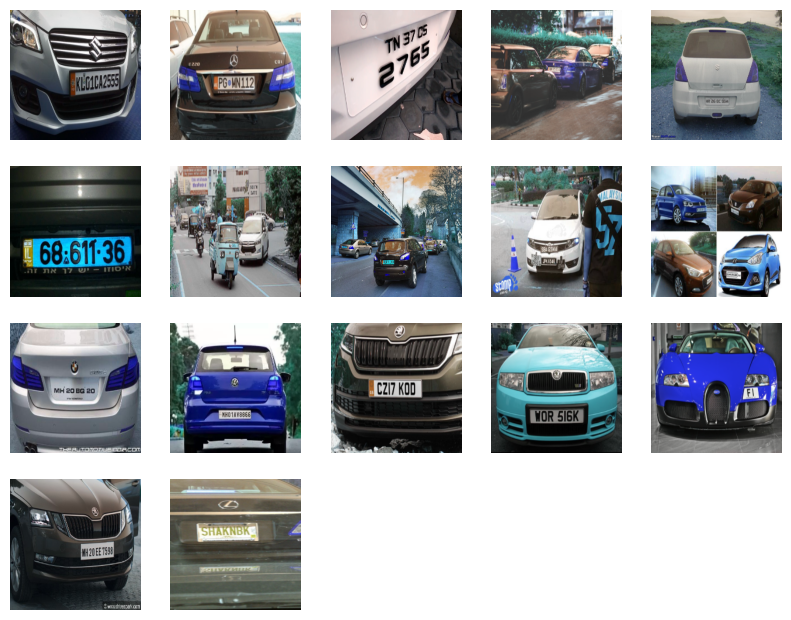

In [6]:
plt.figure(figsize=(10,20))
for i in range(0,17):
    plt.subplot(10,5, i+1)
    plt.axis("off")
    plt.imshow(X[i])

# Exploring Plates With CV2
We can draw the rectangle containing the license plate using the OpenCV library

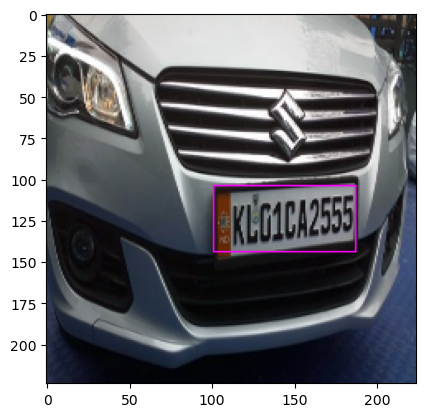

In [7]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

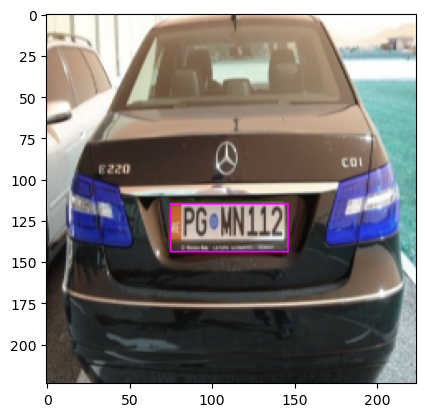

In [8]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(255, 0, 255))
plt.imshow(image)
plt.show()

# Data Preprocessing and Train Test Split

In [9]:
X = np.array(X)
y = np.array(y)
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

In [10]:
X = X / 255
y = y / 255
X[0]

array([[[0.52941176, 0.42352941, 0.21176471],
        [0.61960784, 0.48627451, 0.17647059],
        [0.70196078, 0.57254902, 0.30980392],
        ...,
        [0.16078431, 0.16862745, 0.16470588],
        [0.16862745, 0.16078431, 0.15686275],
        [0.14509804, 0.14117647, 0.13333333]],

       [[0.50196078, 0.41176471, 0.20784314],
        [0.60392157, 0.47058824, 0.16078431],
        [0.58431373, 0.46666667, 0.20784314],
        ...,
        [0.18039216, 0.18039216, 0.17647059],
        [0.16470588, 0.17254902, 0.16078431],
        [0.1372549 , 0.14509804, 0.13333333]],

       [[0.49803922, 0.42352941, 0.24705882],
        [0.6       , 0.4745098 , 0.16862745],
        [0.6       , 0.49411765, 0.24705882],
        ...,
        [0.17254902, 0.16078431, 0.16078431],
        [0.18431373, 0.19215686, 0.17647059],
        [0.14117647, 0.14901961, 0.13333333]],

       ...,

       [[0.15686275, 0.18823529, 0.27843137],
        [0.16078431, 0.19215686, 0.28235294],
        [0.16470588, 0

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)


# Using CNN With Keras

In [12]:
model = Sequential()
# feature extactor
# 1st covolutional layer
model.add(Conv2D(64, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

# 2st covolutional layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


# classification (fully connected layers)
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
train = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32, verbose=1)

c:\Users\Tempo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 189s 8s/step - accuracy: 0.4193 - loss: 0.1078 - val_accuracy: 0.4000 - val_loss: 0.0244
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.4818 - loss: 0.0275 - val_accuracy: 0.6571 - val_loss: 0.0197
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5972 - loss: 0.0195 - val_accuracy: 0.7714 - val_loss: 0.0147
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.7443 - loss: 0.0122 - val_accuracy: 0.8000 - val_loss: 0.0123
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.8517 - loss: 0.0073 - val_accuracy: 0.6857 - val_loss: 0.0092
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.8608 - loss: 0.0038 - val_accuracy: 0.6571 - val_loss: 0.0081
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.8613 - loss: 0.0024 - val_accuracy: 0.6286 - val_loss: 0.0082
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.8924 - loss: 0.0026 - val_accuracy: 0.6857 - val_loss

# CNN Evaluation

In [13]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 71.26%


# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping

# Create the model
model = Sequential()
# feature extraction
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

# classification
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

# Freeze VGG16 base layers
model.layers[0].trainable = False

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
train = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                  epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 56s 1us/step
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 734s 60s/step - accuracy: 0.3707 - loss: 0.0668 - val_accuracy: 0.3429 - val_loss: 0.0294
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 640s 64s/step - accuracy: 0.3981 - loss: 0.0239 - val_accuracy: 0.7714 - val_loss: 0.0112
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 628s 63s/step - accuracy: 0.7212 - loss: 0.0094 - val_accuracy: 0.7714 - val_loss: 0.0082
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 572s 57s/step - accuracy: 0.7587 - loss: 0.0051 - val_accuracy: 0.8286 - val_loss: 0.0071
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 565s 56s/step - accuracy: 0.8217 - loss: 0.0037 - val_accuracy: 0.7429 - val_loss: 0.0060
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 568s 58s/step - accuracy: 0.9006 - loss: 0.0022 - val_accuracy: 0.8000 - val_loss: 0.0052
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 589s 59s/step - accuracy: 0.8880 - loss: 0.0015 - val_accuracy: 0.9143 - val_loss: 0.0051
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 54s/step - 

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 78.16%


# Save Model

In [ ]:
# Save the trained model
model.save("car_plate_detector.h5")

print("Model saved successfully!")

Model saved successfully!


# No Plate Detection System

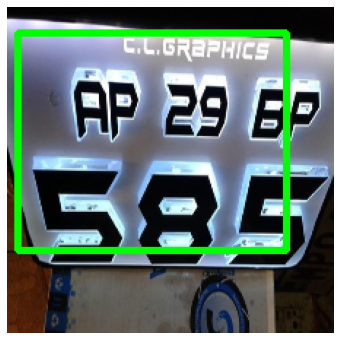

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model("car_plate_detector.h5")

def detect_car_plate(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))  # Resize to match model input
    img_normalized = img_resized / 255.0       # Normalize

    # Expand dimensions to match model input shape (1, 224, 224, 3)
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predict bounding box
    pred = model.predict(img_input)[0]  # Get first (and only) prediction
    xmin, ymin, xmax, ymax = pred * 224  # Scale coordinates back

    # Draw rectangle on original image
    img_with_box = img_resized.copy()
    cv2.rectangle(img_with_box, 
                  (int(xmin), int(ymin)), 
                  (int(xmax), int(ymax)), 
                  (0, 255, 0), 3)

    # Display the result
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

test_image = "/kaggle/input/car-plate-detection/images/Cars114.png"  # Replace with actual image path
detect_car_plate(test_image)


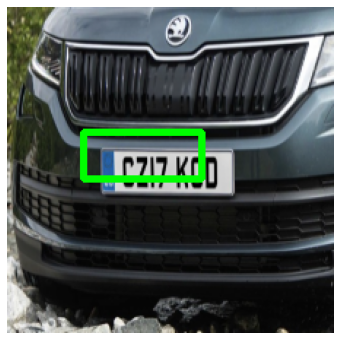

In [ ]:
test_image = "/kaggle/input/car-plate-detection/images/Cars109.png"  # Replace with actual image path
detect_car_plate(test_image)

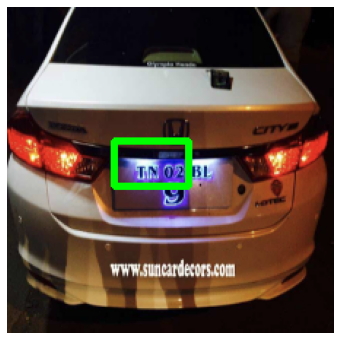

In [ ]:
test_image = "/kaggle/input/car-plate-detection/images/Cars138.png"  # Replace with actual image path
detect_car_plate(test_image)

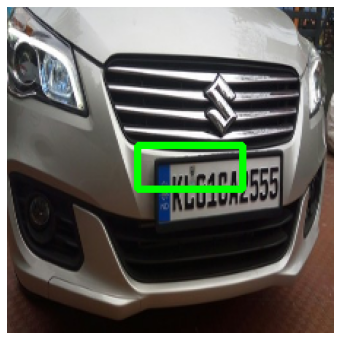

In [ ]:
test_image = "data/raw/images/Cars0.png"  # Replace with actual image path
detect_car_plate(test_image)